In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
# Load data
max_features = 10000
maxlen = 300
epochs = 15
batch_size = 64

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

print('Train sequences:', len(x_train))
print('Test sequences:', len(x_test))

x_train = pad_sequences(x_train, maxlen)
x_test = pad_sequences(x_test, maxlen)

print('X_train shape:', x_train.shape)
print('X_test shape:', x_test.shape)

17464789/17464789 [==============================] - 0s 0us/step
Train sequences: 25000
Test sequences: 25000
X_train shape: (25000, 300)
X_test shape: (25000, 300)


In [4]:
# Creating model
def RNN_model(max_features, maxlen, epochs, batch_size):
    model = models.Sequential([
    layers.Embedding(max_features, 128, input_length=maxlen),
    layers.SimpleRNN(64),
    layers.Dropout(0.25),
    layers.Dense(1, activation="sigmoid"),
])
    # Compilation
    model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=['accuracy']
)

    history_rnn = model.fit(
        x_train, y_train,
        batch_size=64,
        epochs=15,
        validation_data=(x_test, y_test))

    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    print(f'Test Accuracy: {test_accuracy*100:.2f}%')

    return model, history_rnn


In [5]:
# Train
model, history_rnn = RNN_model(max_features, maxlen, epochs=epochs, batch_size=batch_size)

Epoch 1/15
391/391 [==============================] - 78s 195ms/step - loss: 0.6435 - accuracy: 0.6092 - val_loss: 0.6100 - val_accuracy: 0.6539
Epoch 2/15
391/391 [==============================] - 76s 194ms/step - loss: 0.4476 - accuracy: 0.7930 - val_loss: 0.5222 - val_accuracy: 0.7554
Epoch 3/15
391/391 [==============================] - 67s 171ms/step - loss: 0.2113 - accuracy: 0.9179 - val_loss: 0.5095 - val_accuracy: 0.8190
Epoch 4/15
391/391 [==============================] - 67s 172ms/step - loss: 0.0871 - accuracy: 0.9705 - val_loss: 0.6333 - val_accuracy: 0.7988
Epoch 5/15
391/391 [==============================] - 76s 195ms/step - loss: 0.0349 - accuracy: 0.9899 - val_loss: 0.7660 - val_accuracy: 0.7848
Epoch 6/15
391/391 [==============================] - 76s 194ms/step - loss: 0.0226 - accuracy: 0.9934 - val_loss: 0.8296 - val_accuracy: 0.7849
Epoch 7/15
391/391 [==============================] - 67s 170ms/step - loss: 0.0115 - accuracy: 0.9972 - val_loss: 0.9300 - val_ac

In [6]:
# Display the model summary table to see all layers and their parameters
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 128)          1280000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                12352     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 1292417 (4.93 MB)
Trainable params: 1292417 (4.93 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# Creating model
def LSTM_model(max_features, maxlen, epochs, batch_size):
    model = models.Sequential([
    layers.Embedding(max_features, 128, input_length=maxlen),
    layers.LSTM(64),
    layers.Dense(1, activation="sigmoid"),
])
    # Compilation
    model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=['accuracy']
)

    history_lstm = model.fit(
        x_train, y_train,
        batch_size=64,
        epochs=15,
        validation_data=(x_test, y_test))

    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    print(f'Test Accuracy: {test_accuracy*100:.2f}%')

    return model, history_lstm

In [8]:
# Train model
model, history_lstm = LSTM_model(max_features, maxlen, epochs=15, batch_size=batch_size)

Epoch 1/15
391/391 [==============================] - 211s 531ms/step - loss: 0.4372 - accuracy: 0.7929 - val_loss: 0.3220 - val_accuracy: 0.8639
Epoch 2/15
391/391 [==============================] - 244s 624ms/step - loss: 0.2634 - accuracy: 0.8955 - val_loss: 0.3300 - val_accuracy: 0.8740
Epoch 3/15
391/391 [==============================] - 243s 622ms/step - loss: 0.1722 - accuracy: 0.9363 - val_loss: 0.3193 - val_accuracy: 0.8696
Epoch 4/15
391/391 [==============================] - 243s 622ms/step - loss: 0.1371 - accuracy: 0.9500 - val_loss: 0.4151 - val_accuracy: 0.8624
Epoch 5/15
391/391 [==============================] - 242s 620ms/step - loss: 0.1342 - accuracy: 0.9497 - val_loss: 0.4002 - val_accuracy: 0.8614
Epoch 6/15
391/391 [==============================] - 244s 624ms/step - loss: 0.0850 - accuracy: 0.9701 - val_loss: 0.4638 - val_accuracy: 0.8630
Epoch 7/15
391/391 [==============================] - 244s 624ms/step - loss: 0.1175 - accuracy: 0.9580 - val_loss: 0.5334 -

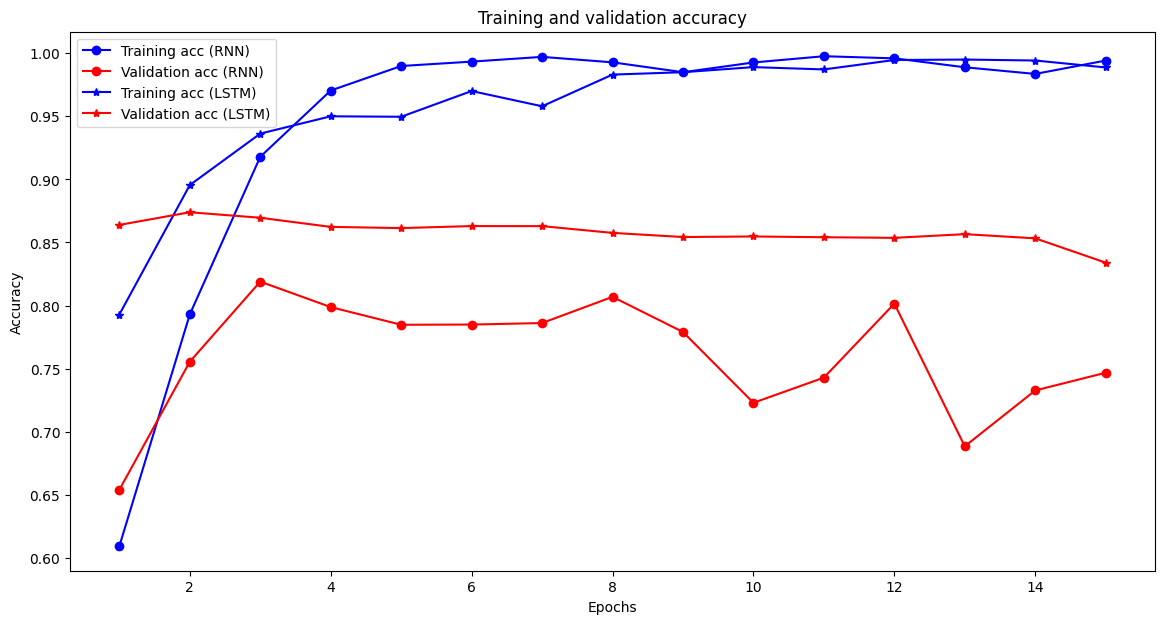

In [9]:
# Vizualization

# RNN training parameters
rnn_val_acc = history_rnn.history['val_accuracy']
rnn_acc = history_rnn.history['accuracy']

# LSTM training parameters
lstm_val_acc = history_lstm.history['val_accuracy']
lstm_acc = history_lstm.history['accuracy']

# Defining the number of epochs
epochs = range(1, len(rnn_acc) + 1)

# Create an accuracy graph
plt.figure(figsize=(14, 7))

# Accuracy graph for RNN
plt.plot(epochs, rnn_acc, 'bo-', label='Training acc (RNN)')
plt.plot(epochs, rnn_val_acc, 'ro-', label='Validation acc (RNN)')

# Accuracy graph for LSTM
plt.plot(epochs, lstm_acc, 'b*-', label='Training acc (LSTM)')
plt.plot(epochs, lstm_val_acc, 'r*-', label='Validation acc (LSTM)')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [10]:
# Creating a Deep LSTM Network
def deep_LSTM_model(max_features, maxlen, epochs, batch_size):
    model = models.Sequential([
    layers.Embedding(input_dim=max_features, output_dim=128, input_length=maxlen),
    layers.LSTM(64, return_sequences=True),
    layers.Dropout(0.1),
    layers.LSTM(128),
    layers.Dropout(0.2),
    layers.Dense(1, activation="sigmoid"),
])
    # Compilation
    model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=['accuracy']
)

    history_deep_lstm = model.fit(
        x_train, y_train,
        batch_size=128,
        epochs=10,
        validation_data=(x_test, y_test))

    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    print(f'Test Accuracy: {test_accuracy*100:.2f}%')

    return model, history_deep_lstm

In [11]:
# Train model
model, history_deep_lstm = deep_LSTM_model(max_features, maxlen, epochs=epochs, batch_size=batch_size)

Epoch 1/10
196/196 [==============================] - 452s 2s/step - loss: 0.3904 - accuracy: 0.8152 - val_loss: 0.3177 - val_accuracy: 0.8722
Epoch 2/10
196/196 [==============================] - 447s 2s/step - loss: 0.2178 - accuracy: 0.9182 - val_loss: 0.3484 - val_accuracy: 0.8657
Epoch 3/10
196/196 [==============================] - 464s 2s/step - loss: 0.1651 - accuracy: 0.9400 - val_loss: 0.3528 - val_accuracy: 0.8702
Epoch 4/10
196/196 [==============================] - 461s 2s/step - loss: 0.1232 - accuracy: 0.9556 - val_loss: 0.3926 - val_accuracy: 0.8611
Epoch 5/10
196/196 [==============================] - 463s 2s/step - loss: 0.0929 - accuracy: 0.9669 - val_loss: 0.4637 - val_accuracy: 0.8595
Epoch 6/10
196/196 [==============================] - 461s 2s/step - loss: 0.0801 - accuracy: 0.9734 - val_loss: 0.4667 - val_accuracy: 0.8607
Epoch 7/10
196/196 [==============================] - 464s 2s/step - loss: 0.0481 - accuracy: 0.9836 - val_loss: 0.6828 - val_accuracy: 0.8430

In [12]:
# Creating a Bidirectional Network
def bidirectional_model(max_features, maxlen, epochs, batch_size):
    model = models.Sequential([
        layers.Embedding(input_dim=max_features, output_dim=128, input_length=maxlen),
        layers.Bidirectional(layers.LSTM(64, return_sequences=True)),
        layers.Dropout(0.1),
        layers.Bidirectional(layers.LSTM(128)),
        layers.Dropout(0.2),
        layers.Dense(1, activation="sigmoid"),
    ])
    # Compilation
    model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=['accuracy']
)

    history_bidirectional = model.fit(
        x_train, y_train,
        batch_size=64,
        epochs=10,
        validation_data=(x_test, y_test))

    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    print(f'Test Accuracy: {test_accuracy*100:.2f}%')

    return model, history_bidirectional

In [13]:
# Train model
model, history_bidirectional = bidirectional_model(max_features, maxlen, epochs=epochs, batch_size=batch_size)

Epoch 1/10
391/391 [==============================] - 1097s 3s/step - loss: 0.3822 - accuracy: 0.8189 - val_loss: 0.3010 - val_accuracy: 0.8746
Epoch 2/10
391/391 [==============================] - 1048s 3s/step - loss: 0.2193 - accuracy: 0.9175 - val_loss: 0.3176 - val_accuracy: 0.8730
Epoch 3/10
391/391 [==============================] - 1027s 3s/step - loss: 0.1592 - accuracy: 0.9421 - val_loss: 0.3641 - val_accuracy: 0.8542
Epoch 4/10
391/391 [==============================] - 1047s 3s/step - loss: 0.1119 - accuracy: 0.9603 - val_loss: 0.3735 - val_accuracy: 0.8578
Epoch 5/10
391/391 [==============================] - 1044s 3s/step - loss: 0.0829 - accuracy: 0.9710 - val_loss: 0.4683 - val_accuracy: 0.8548
Epoch 6/10
391/391 [==============================] - 1045s 3s/step - loss: 0.0636 - accuracy: 0.9784 - val_loss: 0.5396 - val_accuracy: 0.8268
Epoch 7/10
391/391 [==============================] - 1028s 3s/step - loss: 0.0587 - accuracy: 0.9814 - val_loss: 0.5633 - val_accuracy:

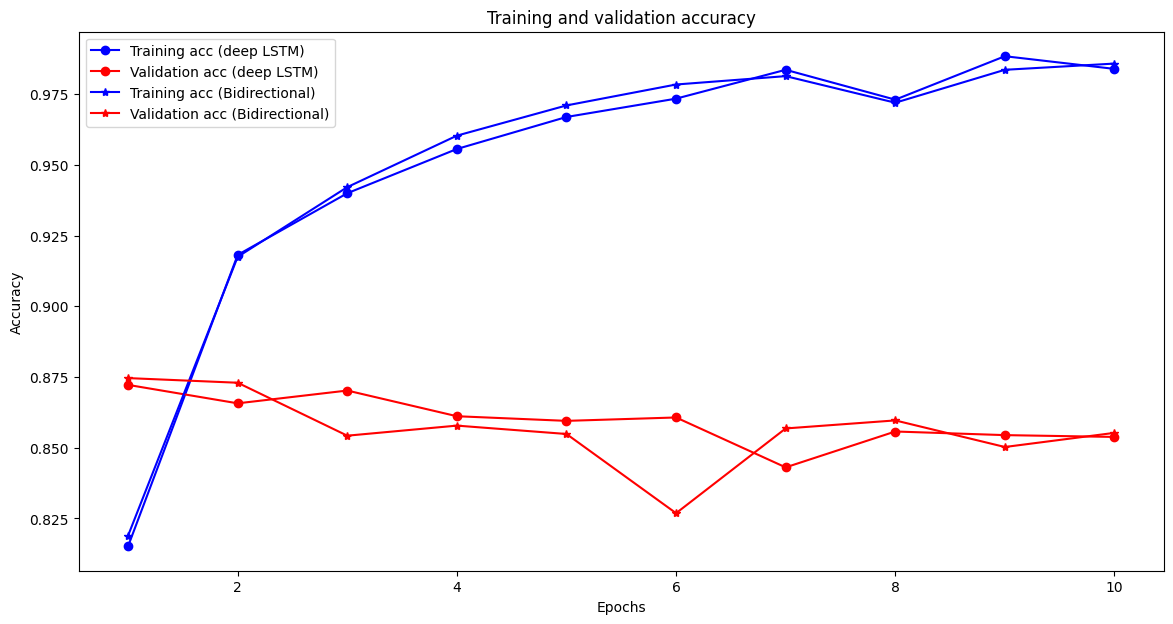

In [14]:
# Vizualization

# Deep LSTM Network training parameters
lstm_val_acc = history_deep_lstm.history['val_accuracy']
lstm_acc = history_deep_lstm.history['accuracy']

# Bidirectional models training parameters
bidirectional_val_acc = history_bidirectional.history['val_accuracy']
bidirectional_acc = history_bidirectional.history['accuracy']

# Defining the number of epochs
epochs = range(1, len(lstm_acc) + 1)

# Create an accuracy graph
plt.figure(figsize=(14, 7))

# Accuracy graph for Deep LSTM Network
plt.plot(epochs, lstm_acc, 'bo-', label='Training acc (deep LSTM)')
plt.plot(epochs, lstm_val_acc, 'ro-', label='Validation acc (deep LSTM)')

# Accuracy graph for Bidirectional
plt.plot(epochs, bidirectional_acc, 'b*-', label='Training acc (Bidirectional)')
plt.plot(epochs, bidirectional_val_acc, 'r*-', label='Validation acc (Bidirectional)')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


Висновки

Проста RNN показала здатність до швидкого навчання, але зіткнулася з проблемами перенавчання, що видно з високих втрат на валідаційних даних порівняно з тренувальними.

Модель LSTM виявилась більш ефективною у врахуванні контексту даних завдяки здатності зберігати інформацію на довгі періоди, що призвело до кращої точності на тестових даних.

Глибока LSTM мережа, яка включала кілька шарів LSTM, показала ще кращі результати, підтверджуючи припущення, що додавання глибини може допомогти в моделюванні складніших залежностей в даних.

Двостороння LSTM мережа забезпечила високу точність, використовуючи інформацію з тексту в обох напрямках, що дозволило ще краще вловлювати контекст відгуків.

Результати експериментів вказують на важливість вибору правильної архітектури нейронної мережі в залежності від специфіки задачі та даних. Глибокі та двосторонні мережі, хоч і вимагають більше часу для навчання, забезпечують значне покращення точності, що робить їх переважним вибором для складних задач обробки природної мови.